In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import statsmodels.formula.api as smf

%matplotlib inline

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [10]:
boston_df.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [14]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


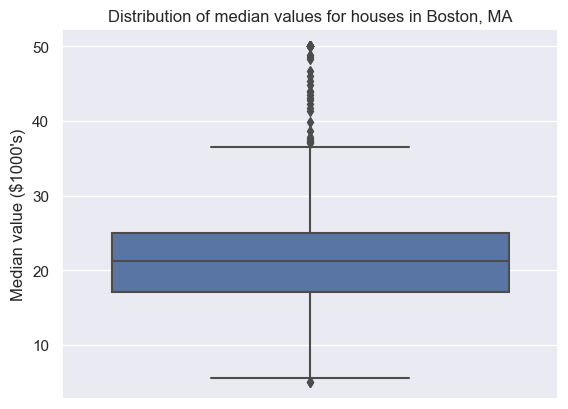

In [185]:
sns.boxplot(data=boston_df, y='MEDV')
plt.title('Distribution of median values for houses in Boston, MA')
plt.ylabel('Median value ($1000\'s)')
plt.show()

Half of the houses in the Boston, MA have median values around \\$22000 while the houses with the lowest median price is valued \\$3000 and
expensive ones are around \$50000.

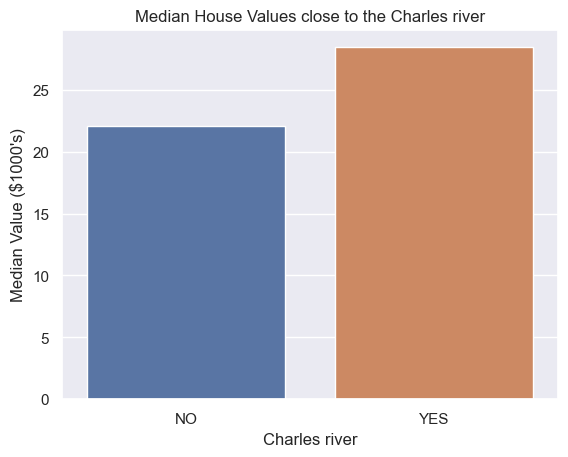

In [186]:
sns.barplot(data=boston_df, x='CHAS', y='MEDV', errorbar=None)
plt.xticks([0.0, 1.0], ['NO', 'YES'])
plt.xlabel('Charles river')
plt.ylabel('Median Value ($1000\'s)')
plt.title('Median House Values close to the Charles river')
plt.show()

In [187]:
boston_df.loc[boston_df['AGE'] <= 35, 'AGE_CATS'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_CATS'] = 'between 35 years and 70 years'
boston_df.loc[boston_df['AGE'] >= 70, 'AGE_CATS'] = '70 years and older'

In [188]:
boston_df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,AGE_CATS
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,between 35 years and 70 years
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,70 years and older
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,between 35 years and 70 years


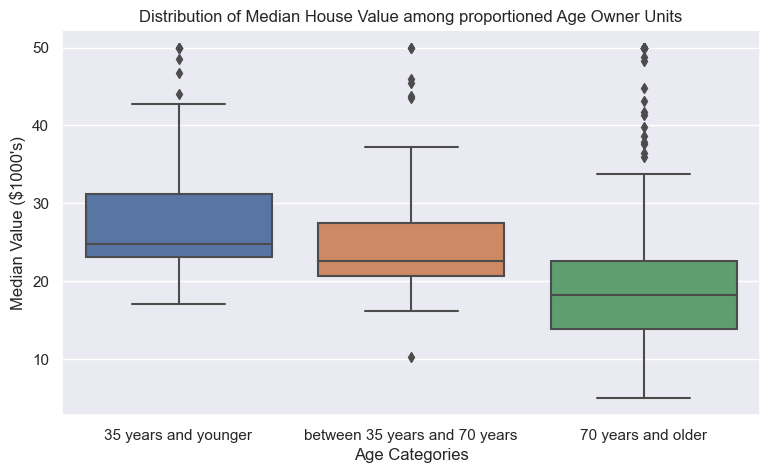

In [189]:
plt.figure(figsize=[9,5])
order = ['35 years and younger', 'between 35 years and 70 years', '70 years and older']
sns.boxplot(data=boston_df, y='MEDV', x='AGE_CATS', order=order)
plt.ylabel('Median Value ($1000\'s)')
plt.xlabel('Age Categories')
plt.title('Distribution of Median House Value among proportioned Age Owner Units')
plt.show()

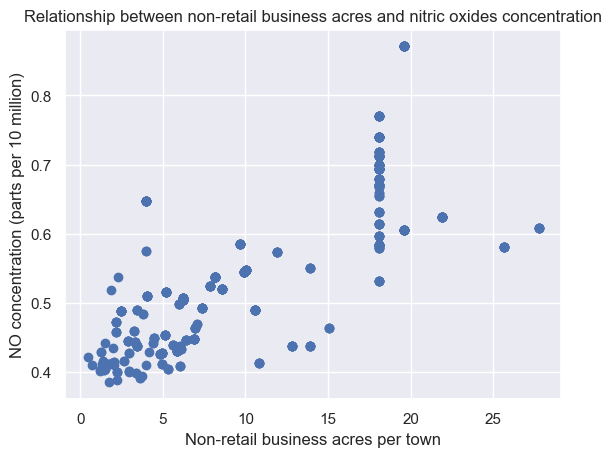

In [192]:
plt.scatter(boston_df.INDUS, boston_df.NOX)
plt.xlabel('Non-retail business acres per town')
plt.ylabel('NO concentration (parts per 10 million)')
plt.title('Relationship between non-retail business acres and nitric oxides concentration')
plt.show()

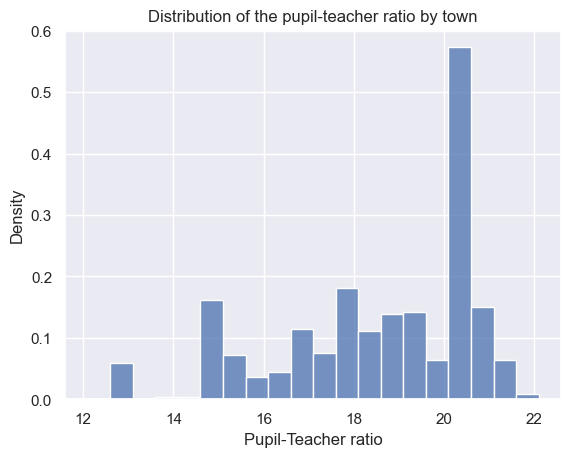

In [194]:
bins = np.arange(boston_df.PTRATIO.min()-0.5, boston_df.PTRATIO.max()+0.5, 0.5)
sns.histplot(boston_df.PTRATIO, stat='density', bins=bins)
plt.title('Distribution of the pupil-teacher ratio by town')
plt.xlabel('Pupil-Teacher ratio')
plt.show()

#### Is there a significant difference in median value of houses bounded by the Charles river or not?
<br>**significance level ($\alpha$) = 0.05**</br>
**Hypothesis**
* $H_o$ : There is no difference between the median value of the houses bounded by the Charles river
* $H_a$ : There is a difference between the median value of the houses bounded by the Charles river

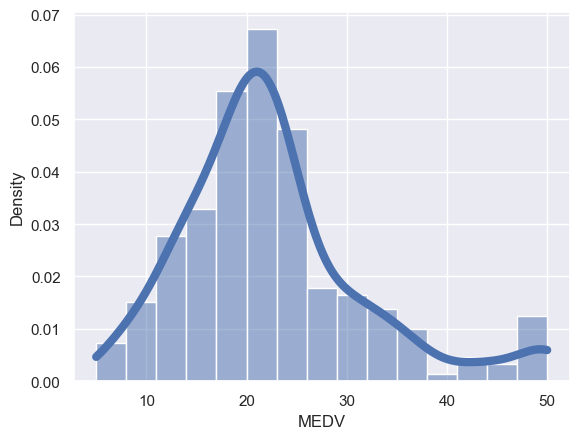

In [195]:
#checking to see if the distribution of median value of the houses in Boston, MA
#followed a normal distribution
sns.histplot(boston_df[['CHAS', 'MEDV']]['MEDV'], stat='density', kde=True, bins=15, line_kws=dict(linewidth=6))
plt.show()

In [196]:
#testing for the equality of the variance among the charles river variables
#since we are considering median value
#center a paramete of the levene function has median as default value
stats.levene(boston_df.query('CHAS == 0')['MEDV'], boston_df.query('CHAS == 1')['MEDV'])

LeveneResult(statistic=4.590342218715871, pvalue=0.03263097600633006)

Since the p-value is less than the 0.05, we can assume inequality of variance in the CHAS variable

In [197]:
t_test, p_value_t = stats.ttest_ind(boston_df.query('CHAS == 0')['MEDV'], boston_df.query('CHAS == 1')['MEDV'], equal_var=False)
print("T-test = {}, P-value = {}".format(t_test, p_value_t)) 

T-test = -3.113291312794837, P-value = 0.003567170098137517


**CONCLUSION:** p-value for the T-test for the CHAS variable is less than the $\alpha$ so we will reject the null hypothesis as
there is a significant difference in the median prices for the houses that are close to the Charles river than
those that are far away from it in Boston, MA.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?
**Hypothesis**
* $H_o$ : There is no difference between the median value of the houses owned by each AGE proportion
* $H_a$ : There is a difference between the median value of the houses ownded by each AGE proportion
<br>**significance level ($\alpha$) = 0.05**</br>

In [198]:
#testing for the equality of the variance among the values of age proportion of owner occupied units
#since we are considering median value
#center a paramater of the levene function has median as default value

thirty_five_younger = boston_df.loc[boston_df['AGE_CATS'] == '35 years and younger', 'MEDV']
thirty_five_seventy = boston_df.loc[boston_df['AGE_CATS'] == 'between 35 years and 70 years', 'MEDV']
seventy_older = boston_df.loc[boston_df['AGE_CATS'] == '70 years and older', 'MEDV']

stats.levene(thirty_five_younger, thirty_five_seventy, seventy_older)

LeveneResult(statistic=3.471820890881101, pvalue=0.031806778061338456)

In [199]:
#ANOVA using f_oneway
f_stats, p_value = stats.f_oneway(thirty_five_younger, thirty_five_seventy, seventy_older)
print("F-Statistic = {}, P-value = {}".format(f_stats, p_value)) 

F-Statistic = 36.40764999196599, P-value = 1.7105011022702984e-15


**CONCLUSION:** Since the p-value is less than 0.05, the null hypothesis is rejected as there is a statistical proof that there is a significant
difference in the median house values among the age proportions of the owner occupied units. Residents that are 35 and younger owes houses whose median values are quite higher than other age groups, with people who are 70 years old and older owing properties that have lower median values.

#### Can we conclude that there is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town?
**Hypothesis**
* $H_o$ : There is no relationship between nitric oxide concentrations and proportion of non-retail business acres per town
* $H_a$ : There is a relationship between nitric oxide concentrations and proportion of non-retail business acres per town
<br>**significance level ($\alpha$) = 0.05**</br>

In [200]:
corr, p_value_c = stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])
print('Correlation coefficient: {}, p-value: {}'.format(corr, p_value_c))

Correlation coefficient: 0.7636514469209157, p-value: 7.91336106123623e-98


**CONCLUSION:** P-value for the correlation coefficient between the proportion of non-retil business acres per town and nitric oxide is less than $\alpha$, so we will reject the null hypothesis. There is a enough proof that there is a strong positive relationship between the two factors. 

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
**Hypothesis**
* $H_o$ : There is no impact caused by the additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
* $H_a$ : There is an impact caused by the additional weighted distance to the five Boston employment centres on the median value of owner occupied homes?
<br>**significance level ($\alpha$) = 0.05**</br>

In [201]:
regression_model = smf.ols("MEDV ~ DIS", data=boston_df).fit()
regression_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        15:26:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**CONCLUSION:** P-value for DIS variable is less than the $\alpha$, so we will reject the null hypothesis. There is a enough proof to show that additional weighted distance to the five Boston employment centres will likely increase the median value of a house by 1 unit.